In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_raw = pd.read_csv('../data/raw/najeemetal25.csv')

print("="*60)
print("DATA CLEANING CHECKLIST")
print("="*60)
print(f"\nOriginal dataset shape: {df_raw.shape}")
print(f"Total records: {df_raw.shape[0]:,}")
print(f"Total variables: {df_raw.shape[1]}")

DATA CLEANING CHECKLIST

Original dataset shape: (14003, 16)
Total records: 14,003
Total variables: 16


In [10]:
print("\n" + "="*60)
print("DATA QUALITY CHECK")
print("="*60)

print(f"\nDuplicate rows: {df_raw.duplicated().sum():,}")
print(f"Percentage duplicated: {(df_raw.duplicated().sum()/len(df_raw)*100):.2f}%")

print(f"\nMissing values total: {df_raw.isnull().sum().sum()}")

print("\nColumn data types:")
print(df_raw.dtypes)

print("\nFirst few rows:")
df_raw.head()


DATA QUALITY CHECK

Duplicate rows: 1,534
Percentage duplicated: 10.95%

Missing values total: 0

Column data types:
StudyHours              int64
Attendance              int64
Resources               int64
Extracurricular         int64
Motivation              int64
Internet                int64
Gender                  int64
Age                     int64
LearningStyle           int64
OnlineCourses           int64
Discussions             int64
AssignmentCompletion    int64
ExamScore               int64
EduTech                 int64
StressLevel             int64
FinalGrade              int64
dtype: object

First few rows:


,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
0,19,64,1,0,0,1,0,19,2,8,1,59,40,0,1,3
1,19,64,1,0,0,1,0,23,3,16,0,90,66,0,1,2
2,19,64,1,0,0,1,0,28,1,19,0,67,99,1,1,0
3,19,64,1,1,0,1,0,19,2,8,1,59,40,0,1,3
4,19,64,1,1,0,1,0,23,3,16,0,90,66,0,1,2


In [11]:
df = df_raw.copy()

print("="*60)
print("REMOVING DUPLICATES")
print("="*60)

duplicates = df.duplicated()
print(f"\nDuplicates found: {duplicates.sum():,}")

if duplicates.sum() > 0:
    print("\nExample duplicate rows:")
    duplicate_rows = df[df.duplicated(keep=False)].head(4)
    print(duplicate_rows)

    df = df.drop_duplicates(keep='first')

    print(f"\nDuplicates removed!")
    print(f"Original size: {len(df_raw):,}")
    print(f"After cleaning: {len(df):,}")
    print(f"Rows removed: {len(df_raw) - len(df):,}")
else:
    print(f"\nVerification - Duplicates remaining: {df.duplicated().sum()}")

REMOVING DUPLICATES

Duplicates found: 1,534

Example duplicate rows:
    StudyHours  Attendance  Resources  Extracurricular  Motivation  Internet  \
0           19          64          1                0           0         1   
1           19          64          1                0           0         1   
2           19          64          1                0           0         1   
12          19          64          1                0           0         1   

    Gender  Age  LearningStyle  OnlineCourses  Discussions  \
0        0   19              2              8            1   
1        0   23              3             16            0   
2        0   28              1             19            0   
12       0   19              2              8            1   

    AssignmentCompletion  ExamScore  EduTech  StressLevel  FinalGrade  
0                     59         40        0            1           3  
1                     90         66        0            1           2  
2 

In [12]:
print("="*60)
print("DATA DISTRIBUTION AFTER CLEANING")
print("="*60)

print("\nStress Level distribution:")
print(df['StressLevel'].value_counts().sort_index())
print(f"\nPercentages:")
print((df['StressLevel'].value_counts(normalize=True).sort_index() * 100).round(2))

print("\nExam Score statistics:")
print(df['ExamScore'].describe())

print("\nMean scores by stress level (after cleaning):")
print(df.groupby('StressLevel')['ExamScore'].agg(['mean', 'std', 'count']).round(2))

DATA DISTRIBUTION AFTER CLEANING

Stress Level distribution:
StressLevel
0    2524
1    3614
2    6331
Name: count, dtype: int64

Percentages:
StressLevel
0    20.24
1    28.98
2    50.77
Name: proportion, dtype: float64

Exam Score statistics:
count    12469.000000
mean        70.310691
std         17.696639
min         40.000000
25%         55.000000
50%         70.000000
75%         86.000000
max        100.000000
Name: ExamScore, dtype: float64

Mean scores by stress level (after cleaning):
              mean    std  count
StressLevel                     
0            71.90  17.51   2524
1            69.74  17.83   3614
2            70.00  17.66   6331


In [15]:
print("="*60)
print("IDENTIFIED CATEGORICAL VARIABLES")
print("="*60)

df['StressCategory'] = df['StressLevel'].map({
    0: 'Low',
    1: 'Medium', 
    2: 'High'})

print("\nIdentified 'Stress Category' Variable")
print("\nDistribution:")
print(df['StressCategory'].value_counts())

print("\nVerification - Row Check:")
print(df[['StressLevel', 'StressCategory']].head(10))

IDENTIFIED CATEGORICAL VARIABLES

Identified 'Stress Category' Variable

Distribution:
StressCategory
High      6331
Medium    3614
Low       2524
Name: count, dtype: int64

Verification - Row Check:
   StressLevel StressCategory
0            1         Medium
1            1         Medium
2            1         Medium
3            1         Medium
4            1         Medium
5            1         Medium
6            1         Medium
7            1         Medium
8            1         Medium
9            1         Medium


In [16]:
df['PerformanceLevel'] = pd.cut(
    df['ExamScore'],
    bins=[0, 60, 70, 80, 100],
    labels=['Low (F)', 'Medium (D-C)', 'High (B)', 'Very High (A)'],
    include_lowest=True)
print("Identified 'PerformanceLevel' Variable")
print("\nDistribution of Performance Levels:")
print(df['PerformanceLevel'].value_counts().sort_index())
print(f"\nPercentages:")
print((df['PerformanceLevel'].value_counts(normalize=True).sort_index() * 100).round(2))

df['HighPerformer'] = (df['ExamScore'] >= 70).astype(int)
print(f"\nIdentified 'HighPerformer' binary variable (1 = score ≥70, 0 = score <70)")
print(f"High performers: {df['HighPerformer'].sum():,} ({df['HighPerformer'].mean()*100:.1f}%)")
print(f"Low performers: {(1-df['HighPerformer']).sum():,} ({(1-df['HighPerformer']).mean()*100:.1f}%)")

Identified 'PerformanceLevel' Variable

Distribution of Performance Levels:
PerformanceLevel
Low (F)          4167
Medium (D-C)     2140
High (B)         1914
Very High (A)    4248
Name: count, dtype: int64

Percentages:
PerformanceLevel
Low (F)          33.42
Medium (D-C)     17.16
High (B)         15.35
Very High (A)    34.07
Name: proportion, dtype: float64

Identified 'HighPerformer' binary variable (1 = score ≥70, 0 = score <70)
High performers: 6,344 (50.9%)
Low performers: 6,125 (49.1%)


In [21]:
if 'StudyHours' in df.columns:
    print("="*60)
    print("STUDY HOURS ANALYSIS")
    print("="*60)

    print("\nStudyHours Statistics:")
    print(df['StudyHours'].describe())

    df['StudyCategory'] = pd.qcut(
        df['StudyHours'],
        q=3,
        labels=['Low Study', 'Medium Study', 'High Study'],
        duplicates='drop')
    print("\nIdentified 'StudyCategory' Variable")
    print("\nDistribution:")
    print(df['StudyCategory'].value_counts().sort_index())
else:
    print("StudyHours variable not found")

STUDY HOURS ANALYSIS

StudyHours Statistics:
count    12469.000000
mean        20.034405
std          6.049485
min          5.000000
25%         16.000000
50%         20.000000
75%         24.000000
max         44.000000
Name: StudyHours, dtype: float64

Identified 'StudyCategory' Variable

Distribution:
StudyCategory
Low Study       4337
Medium Study    4526
High Study      3606
Name: count, dtype: int64


In [22]:
print("="*60)
print("OUTLIER DETECTION")
print("="*60)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outliers, lower, upper = detect_outliers_iqr(df, 'ExamScore')
print(f"\nExamScore outliers:")
print(f"  Valid range (IQR method): {lower:.2f} to {upper:.2f}")
print(f"  Number of outliers: {len(outliers)}")
print(f"  Percentage: {(len(outliers)/len(df)*100):.2f}%")

print(f"\nData validity check:")
print(f"ExamScores below 0: {(df['ExamScore'] < 0).sum()}")
print(f"ExamScores above 100: {(df['ExamScore'] > 100).sum()}")
print(f"StressLevel values outside 0-2: {(~df['StressLevel'].isin([0,1,2])).sum()}")

print("\nNo impossible values found")

OUTLIER DETECTION

ExamScore outliers:
  Valid range (IQR method): 8.50 to 132.50
  Number of outliers: 0
  Percentage: 0.00%

Data validity check:
ExamScores below 0: 0
ExamScores above 100: 0
StressLevel values outside 0-2: 0

No impossible values found


In [24]:
print("="*60)
print("CREATING COMPOSITE VARIABLES")
print("="*60)

engagement_vars = []
for var in ['Attendance', 'AssignmentCompletion', 'Discussions', 'OnlineCourses']:
    if var in df.columns:
        engagement_vars.append(var)

print(f"\nEngagement variables found: {engagement_vars}")

if len(engagement_vars) >= 2:
    df['EngagementScore'] = df[engagement_vars].mean(axis=1)
    
    print(f"\nIdentified 'EngagementScore' from: {', '.join(engagement_vars)}")
    print(f"\nEngagement Score statistics:")
    print(df['EngagementScore'].describe())

    df['EngagementLevel'] = pd.qcut(
        df['EngagementScore'],
        q=3,
        labels=['Low Engagement', 'Medium Engagement', 'High Engagement'],
        duplicates='drop')

    print(f"\nIdentified 'EngagementLevel' categories:")
    print(df['EngagementLevel'].value_counts())

CREATING COMPOSITE VARIABLES

Engagement variables found: ['Attendance', 'AssignmentCompletion', 'Discussions', 'OnlineCourses']

Identified 'EngagementScore' from: Attendance, AssignmentCompletion, Discussions, OnlineCourses

Engagement Score statistics:
count    12469.000000
mean        41.308305
std          4.913136
min         28.500000
25%         37.750000
50%         41.250000
75%         44.750000
max         54.500000
Name: EngagementScore, dtype: float64

Identified 'EngagementLevel' categories:
EngagementLevel
Low Engagement       4255
Medium Engagement    4124
High Engagement      4090
Name: count, dtype: int64


In [25]:
print("="*60)
print("CLEANED DATASET SUMMARY")
print("="*60)

print(f"\nDataset size: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Removed {len(df_raw) - len(df):,} duplicate rows")

print("\nNew variables created:")
new_vars = ['StressCategory', 'PerformanceLevel', 'HighPerformer']
if 'StudyCategory' in df.columns:
    new_vars.append('StudyCategory')
if 'EngagementScore' in df.columns:
    new_vars.extend(['EngagementScore', 'EngagementLevel'])

for var in new_vars:
    if var in df.columns:
        print(f"{var}")

print("\nFinal column list:")
print(df.columns.tolist())

CLEANED DATASET SUMMARY

Dataset size: 12,469 rows × 22 columns
Removed 1,534 duplicate rows

New variables created:
StressCategory
PerformanceLevel
HighPerformer
StudyCategory
EngagementScore
EngagementLevel

Final column list:
['StudyHours', 'Attendance', 'Resources', 'Extracurricular', 'Motivation', 'Internet', 'Gender', 'Age', 'LearningStyle', 'OnlineCourses', 'Discussions', 'AssignmentCompletion', 'ExamScore', 'EduTech', 'StressLevel', 'FinalGrade', 'StressCategory', 'PerformanceLevel', 'HighPerformer', 'StudyCategory', 'EngagementScore', 'EngagementLevel']


In [26]:
print("="*60)
print("VERIFICATION: Main Finding After Cleaning")
print("="*60)

print("\nMean exam scores by stress level:")
result = df.groupby('StressCategory')['ExamScore'].agg(['mean', 'std', 'count'])
print(result.round(2))

from scipy.stats import f_oneway

low = df[df['StressLevel'] == 0]['ExamScore']
med = df[df['StressLevel'] == 1]['ExamScore']
high = df[df['StressLevel'] == 2]['ExamScore']

f_stat, p_val = f_oneway(low, med, high)
print(f"\nANOVA after cleaning:")
print(f"  F-statistic: {f_stat:.3f}")
print(f"  P-value: {p_val:.6f}")
print(f"  {'Still significant' if p_val < 0.001 else 'Not significant'}")

VERIFICATION: Main Finding After Cleaning

Mean exam scores by stress level:
                 mean    std  count
StressCategory                     
High            70.00  17.66   6331
Low             71.90  17.51   2524
Medium          69.74  17.83   3614

ANOVA after cleaning:
  F-statistic: 12.984
  P-value: 0.000002
  Still significant


In [27]:
output_path = '../data/processed/cleaned_data.csv'
df.to_csv(output_path, index=False)

print("="*60)
print("SAVING CLEANED DATA")
print("="*60)
print(f"\nCleaned data saved to: {output_path}")
print(f"\nFile contains:")
print(f"- {len(df):,} rows")
print(f"- {len(df.columns)} columns")
print(f"- No duplicates")
print(f"- No missing values")

SAVING CLEANED DATA

Cleaned data saved to: ../data/processed/cleaned_data.csv

File contains:
- 12,469 rows
- 22 columns
- No duplicates
- No missing values


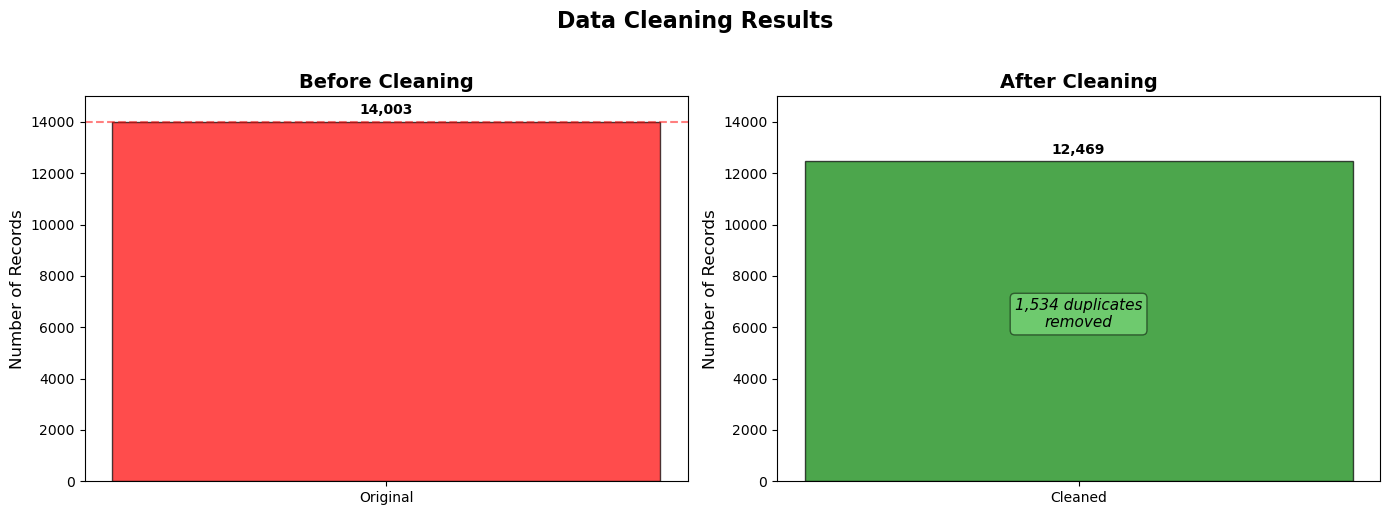


Data reduction: 10.95% of records removed


In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(['Original'], [len(df_raw)], color='red', alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Number of Records', fontsize=12)
axes[0].set_title('Before Cleaning', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 15000)
axes[0].text(0, len(df_raw) + 300, f'{len(df_raw):,}', ha='center', fontweight='bold')
axes[0].axhline(y=len(df_raw), color='red', linestyle='--', alpha=0.5)

axes[1].bar(['Cleaned'], [len(df)], color='green', alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Number of Records', fontsize=12)
axes[1].set_title('After Cleaning', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 15000)
axes[1].text(0, len(df) + 300, f'{len(df):,}', ha='center', fontweight='bold')
axes[1].text(0, 6000, f'{len(df_raw) - len(df):,} duplicates\nremoved', 
             ha='center', fontsize=11, style='italic',
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.suptitle('Data Cleaning Results', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\nData reduction: {((len(df_raw)-len(df))/len(df_raw)*100):.2f}% of records removed")